## 서울시 행정동별 자동차 등록 현황

In [60]:
import pandas as pd

# CSV 파일 불러오기
file_path = r"C:\Users\user\Desktop\dataset\서울시 행정동별 자동차 등록대수 현황.csv"
car = pd.read_csv(file_path, encoding="cp949")  # 또는 euc-kr

# 데이터 확인
print(car.head())  # 상위 5개 행 출력


   사용본거지 시군구 읍면동 (행정동)   연료    계  관용_승용  관용_승합  관용_화물  관용_특수  자가용_승용  자가용승합  \
0  서울특별시 종로구    종로구 기타  휘발유  1.0      0      0      0      0       0      1   
1  서울특별시 종로구    종로구 기타  휘발유  2.0      0      0      0      0       0      2   
2  서울특별시 종로구    종로구 기타  휘발유  1.0      0      0      0      0       0      1   
3  서울특별시 종로구    종로구 기타   경유  NaN      0      0      0      0       0      0   
4  서울특별시 종로구    종로구 기타   경유  NaN      0      0      0      0       0      1   

   자가용화물  자가용특수  영업용_승용  영업용승합  영업용화물  영업용특수  
0      0      0       0      0      0      0  
1      0      0       0      0      0      0  
2      0      0       0      0      0      0  
3      1      0       0      0      0      0  
4      0      0       0      0      0      0  


In [61]:
# 결측치 개수 확인
print(car.isnull().sum())

사용본거지 시군구     0
읍면동 (행정동)     0
연료            0
계            64
관용_승용         0
관용_승합         0
관용_화물         0
관용_특수         0
자가용_승용        0
자가용승합         0
자가용화물         0
자가용특수         0
영업용_승용        0
영업용승합         0
영업용화물         0
영업용특수         0
dtype: int64


In [62]:
# '계' 칼럼을 제외한 나머지 칼럼들로 중복행 찾기
car_duplicates = car.drop(columns=["계"]).duplicated()

# 중복된 행이 있는지 확인
print(f"중복된 행 개수: {car_duplicates.sum()}")

# 중복된 행이 True인 부분만 추출하여 확인
duplicate_rows = car[car_duplicates]

# 중복된 행 출력
print(duplicate_rows)

중복된 행 개수: 34
       사용본거지 시군구 읍면동 (행정동)   연료    계  관용_승용  관용_승합  관용_화물  관용_특수  자가용_승용  \
2      서울특별시 종로구    종로구 기타  휘발유  1.0      0      0      0      0       0   
5      서울특별시 종로구    종로구 기타  휘발유  2.0      0      0      0      0       0   
6      서울특별시 종로구    종로구 기타  휘발유  1.0      0      0      0      0       0   
141     서울특별시 중구    중구 기타1  휘발유  NaN      0      0      0      0       0   
142     서울특별시 중구    중구 기타1  휘발유  NaN      0      0      0      0       0   
143     서울특별시 중구    중구 기타1  휘발유  NaN      0      0      0      0       0   
144     서울특별시 중구    중구 기타1  휘발유  NaN      0      0      0      0       0   
145     서울특별시 중구    중구 기타1  휘발유  NaN      0      0      0      0       0   
284    서울특별시 용산구    용산구 기타  휘발유  NaN      0      0      0      0       0   
287    서울특별시 용산구    용산구 기타  휘발유  NaN      0      0      0      0       0   
289    서울특별시 용산구    용산구 기타  휘발유  2.0      0      0      0      0       0   
291    서울특별시 용산구    용산구 기타  휘발유  NaN      0      0      0      0       0   

In [63]:
# 중복된 행 제거 (하나만 남기기)
car = car.drop_duplicates(subset=car.columns.difference(["계"]))

# 결측치 채우기
columns_to_sum = [
    "관용_승용", "관용_승합", "관용_화물", "관용_특수",
    "자가용_승용", "자가용승합", "자가용화물", "자가용특수",
    "영업용_승용", "영업용승합", "영업용화물", "영업용특수"]

car.loc[car["계"].isnull(), "계"] = car.loc[car["계"].isnull(), columns_to_sum].sum(axis=1)

# 결과 확인
print(f"결측치 확인: {car['계'].isnull().sum()}")  # 결측치가 0이 되는지 확인
print(car.isnull().sum())  # 나머지 결측치 확인


결측치 확인: 0
사용본거지 시군구    0
읍면동 (행정동)    0
연료           0
계            0
관용_승용        0
관용_승합        0
관용_화물        0
관용_특수        0
자가용_승용       0
자가용승합        0
자가용화물        0
자가용특수        0
영업용_승용       0
영업용승합        0
영업용화물        0
영업용특수        0
dtype: int64


In [73]:
car.to_csv('행정동별차량등록미리보기.csv', index=False, encoding='utf-8-sig')

In [64]:
car_grouped = car.groupby("읍면동 (행정동)", as_index=False).sum()

# 사용본거지 시군구는 첫 번째 값만 남기기
car_grouped["사용본거지 시군구"] = car.groupby("읍면동 (행정동)")["사용본거지 시군구"].first().values

# 연료 컬럼 삭제
car_grouped = car_grouped.drop(columns=["연료"], errors="ignore")

# 결과 확인
print(car_grouped.head())


   읍면동 (행정동)  사용본거지 시군구        계  관용_승용  관용_승합  관용_화물  관용_특수  자가용_승용  자가용승합  \
0  강남구 개포1동   서울특별시 강남구   3875.0      0      1      0      1      11   3184   
1  강남구 개포2동   서울특별시 강남구  10266.0      0      0      0      3       5   9390   
2  강남구 개포4동   서울특별시 강남구   8552.0      0      1      2      0       6   7583   
3     강남구 기타  서울특별시 강남구     29.0      0      0      0      0       0     24   
4    강남구 기타1  서울특별시 강남구    485.0      0      0      0      0       0    338   

   자가용화물  자가용특수  영업용_승용  영업용승합  영업용화물  영업용특수  
0    103    385       3     55    107     25  
1    103    271       3    167     52    272  
2    201    669       3     35      0     52  
3      2      3       0      0      0      0  
4     30    103       0     14      0      0  


In [65]:
sigu_counts = car_grouped["사용본거지 시군구"].value_counts().sort_values()
print(sigu_counts)

사용본거지 시군구
서울특별시 금천구     13
서울특별시 강북구     15
서울특별시 서대문구    16
서울특별시 도봉구     16
서울특별시 동작구     17
서울특별시 용산구     18
서울특별시 은평구     18
서울특별시 중랑구     18
서울특별시 광진구     18
서울특별시 성동구     19
서울특별시 동대문구    19
서울특별시 양천구     20
서울특별시 구로구     21
서울특별시 종로구     21
서울특별시 성북구     22
서울특별시 강서구     22
서울특별시 서초구     23
서울특별시 노원구     23
서울특별시 영등포구    23
서울특별시 마포구     24
서울특별시 강동구     24
서울특별시 관악구     24
서울특별시 강남구     26
서울특별시 중구      27
서울특별시 송파구     30
Name: count, dtype: int64


In [66]:
# 필요한 칼럼만 선택해서 새로운 데이터프레임 생성
car_final = car_grouped[["읍면동 (행정동)", "사용본거지 시군구", "계"]]

# 결과 확인
print(car_final.head())  # 상위 5개 행 출력


   읍면동 (행정동)  사용본거지 시군구        계
0  강남구 개포1동   서울특별시 강남구   3875.0
1  강남구 개포2동   서울특별시 강남구  10266.0
2  강남구 개포4동   서울특별시 강남구   8552.0
3     강남구 기타  서울특별시 강남구     29.0
4    강남구 기타1  서울특별시 강남구    485.0


In [67]:
car_final.to_csv('행정동별차량등록전처리.csv', index=False, encoding='utf-8-sig')

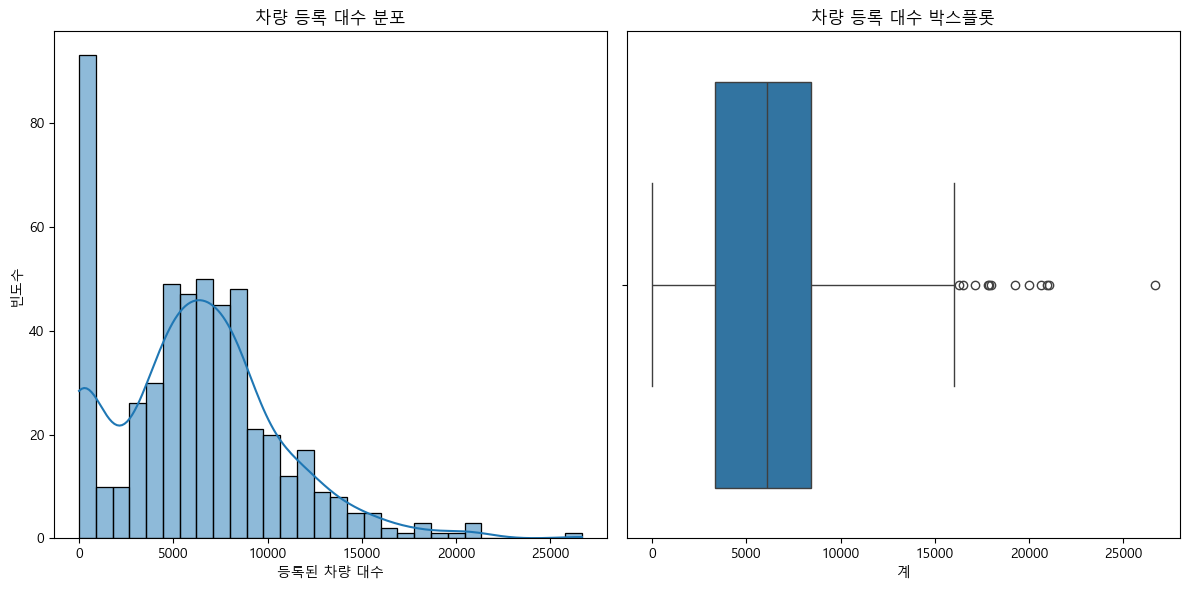

In [68]:
plt.figure(figsize=(12, 6))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(car_final["계"], bins=30, kde=True)
plt.title("차량 등록 대수 분포")
plt.xlabel("등록된 차량 대수")
plt.ylabel("빈도수")

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=car_final["계"])
plt.title("차량 등록 대수 박스플롯")

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_351128\2941560642.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="사용본거지 시군구", y="계", data=car_final, ci=None, estimator="sum")


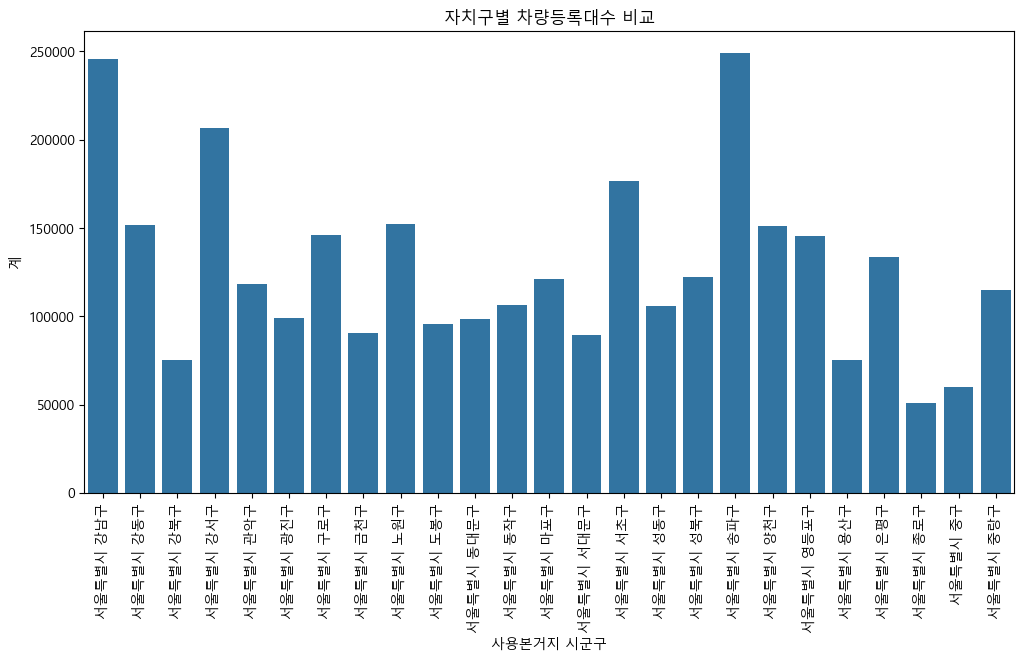

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# 자치구별로 읍면동 (행정동) 간의 차량등록대수를 비교하는 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(x="사용본거지 시군구", y="계", data=car_final, ci=None, estimator="sum")
plt.title("자치구별 차량등록대수 비교")
plt.xticks(rotation=90)
plt.show()


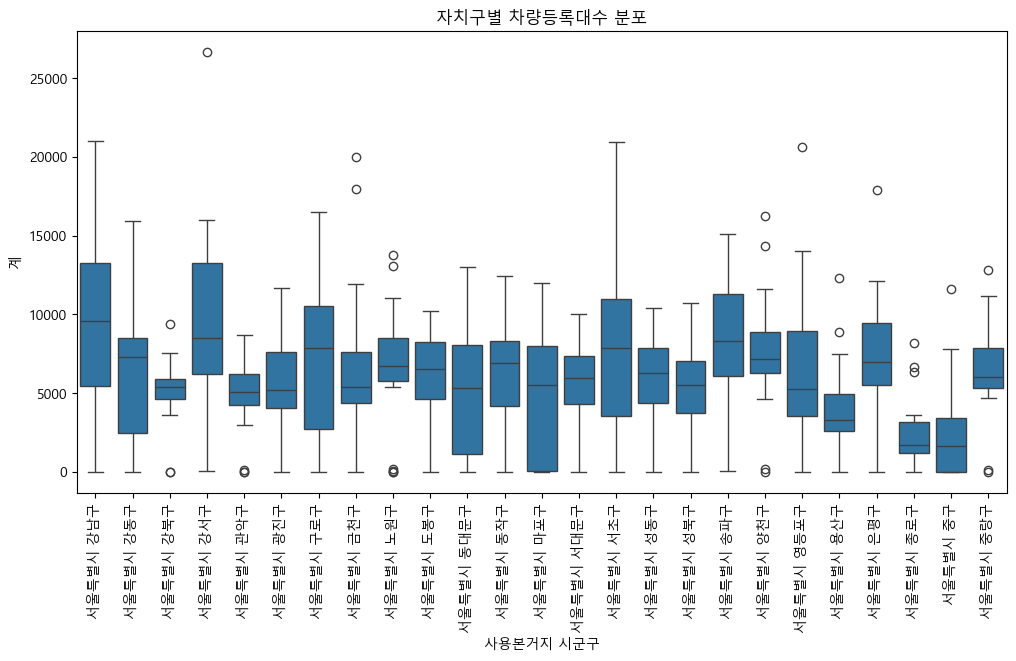

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="사용본거지 시군구", y="계", data=car_final)
plt.title("자치구별 차량등록대수 분포")
plt.xticks(rotation=90)
plt.show()

자치구로 묶어서 다시 행정동별로 비교

In [71]:
# 자치구 리스트
sigu_list = car_final["사용본거지 시군구"].unique()
sigu_list

array(['서울특별시 강남구', '서울특별시 강동구', '서울특별시 강북구', '서울특별시 강서구', '서울특별시 관악구',
       '서울특별시 광진구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 노원구', '서울특별시 도봉구',
       '서울특별시 동대문구', '서울특별시 동작구', '서울특별시 마포구', '서울특별시 서대문구', '서울특별시 서초구',
       '서울특별시 성동구', '서울특별시 성북구', '서울특별시 송파구', '서울특별시 양천구', '서울특별시 영등포구',
       '서울특별시 용산구', '서울특별시 은평구', '서울특별시 종로구', '서울특별시 중구', '서울특별시 중랑구'],
      dtype=object)

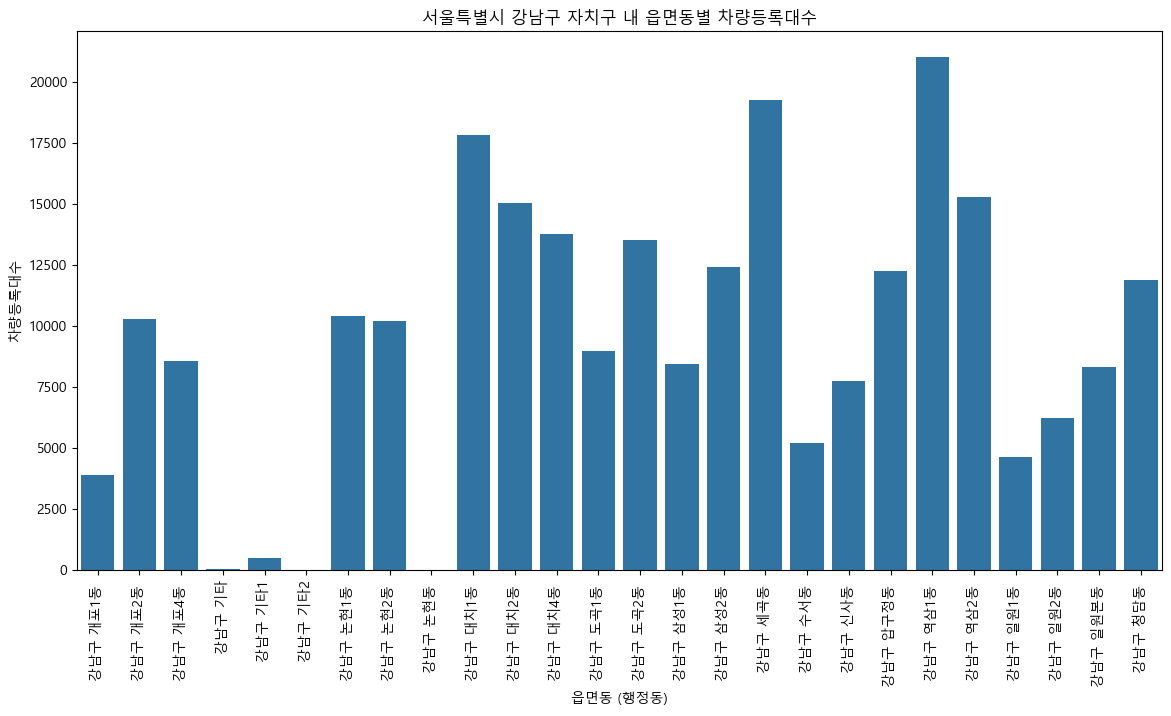

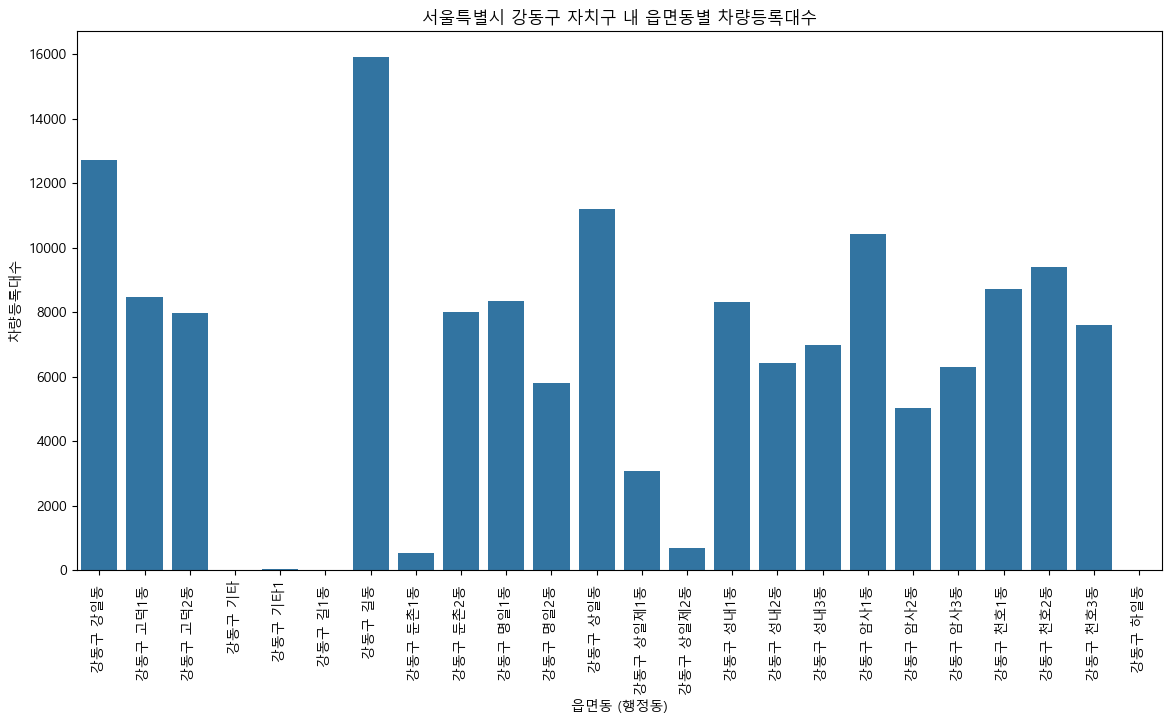

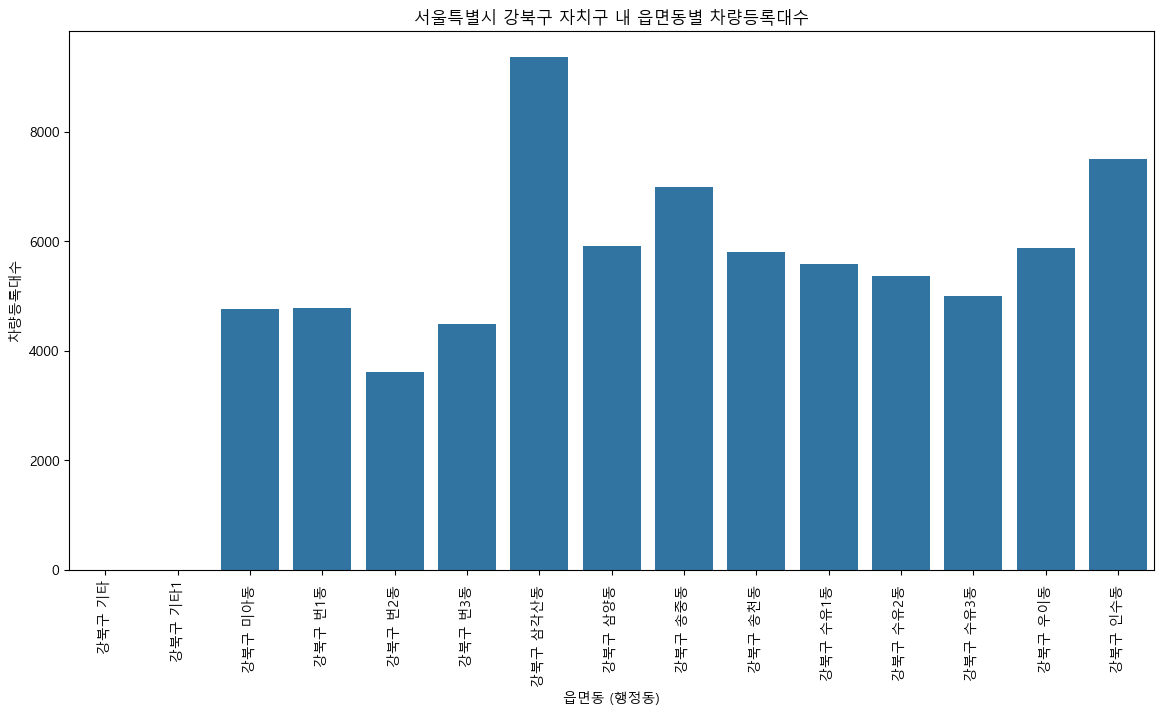

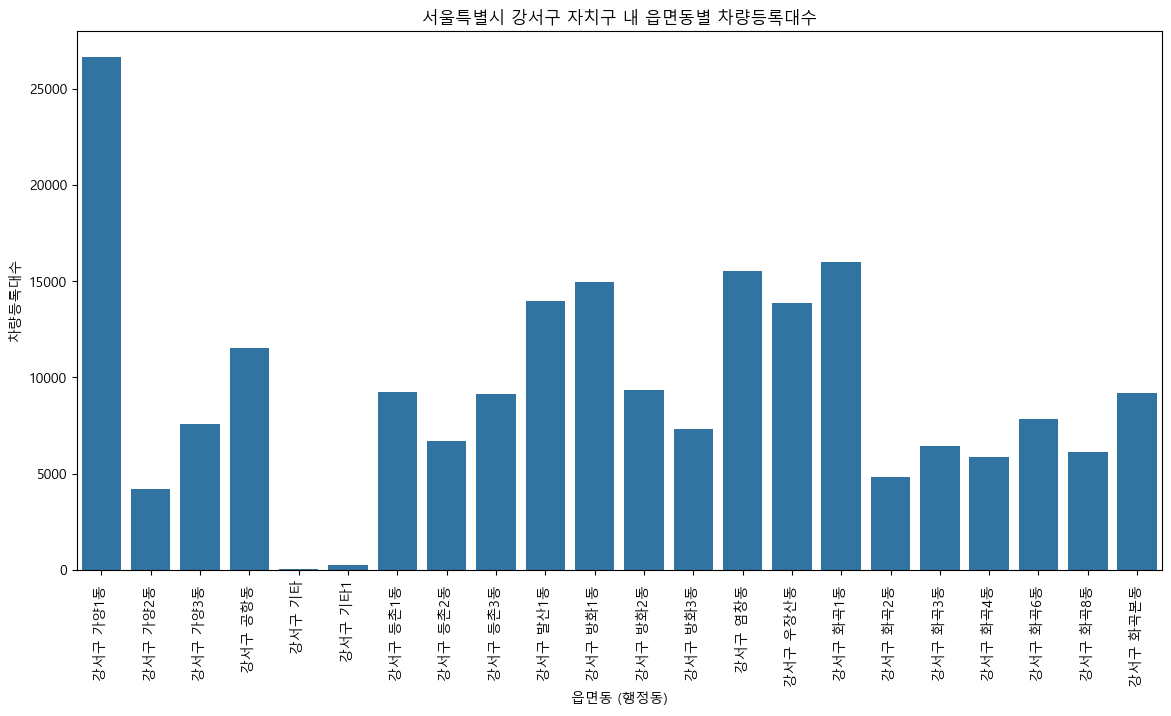

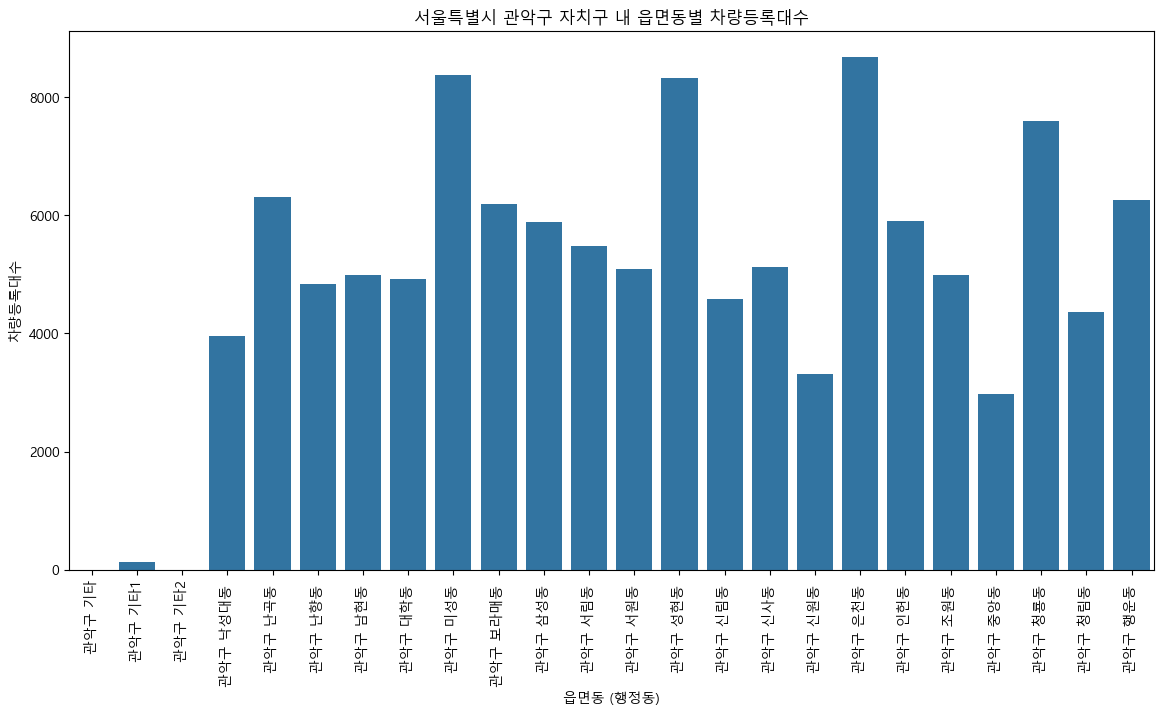

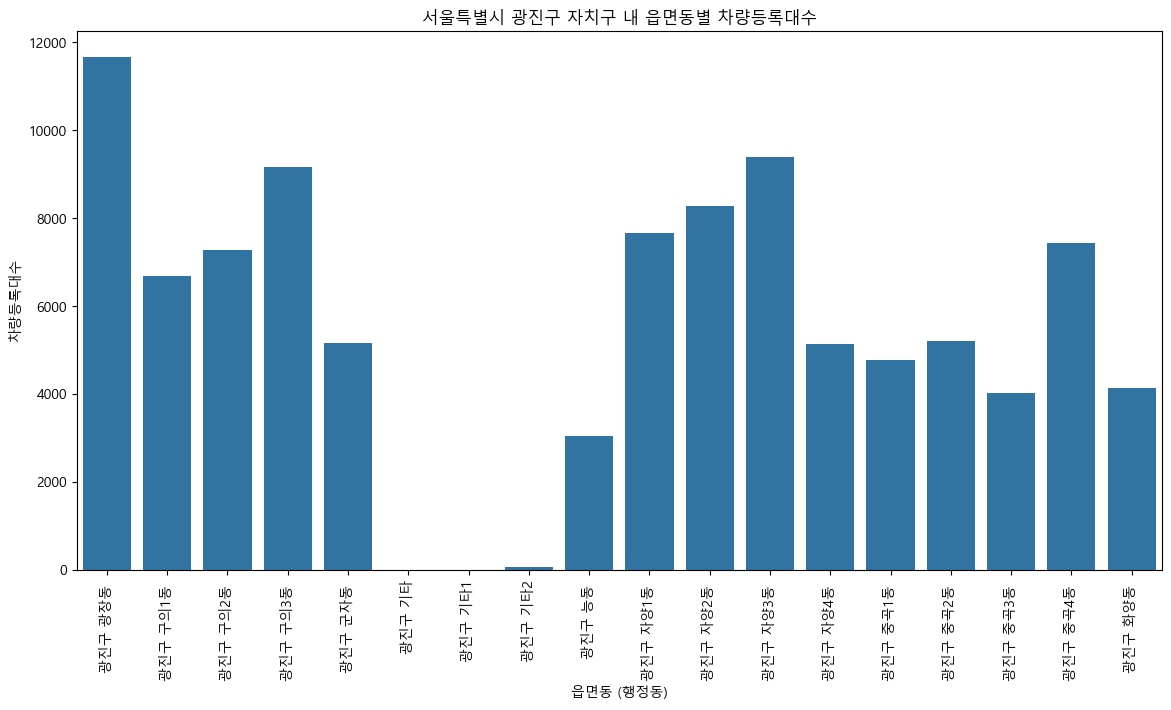

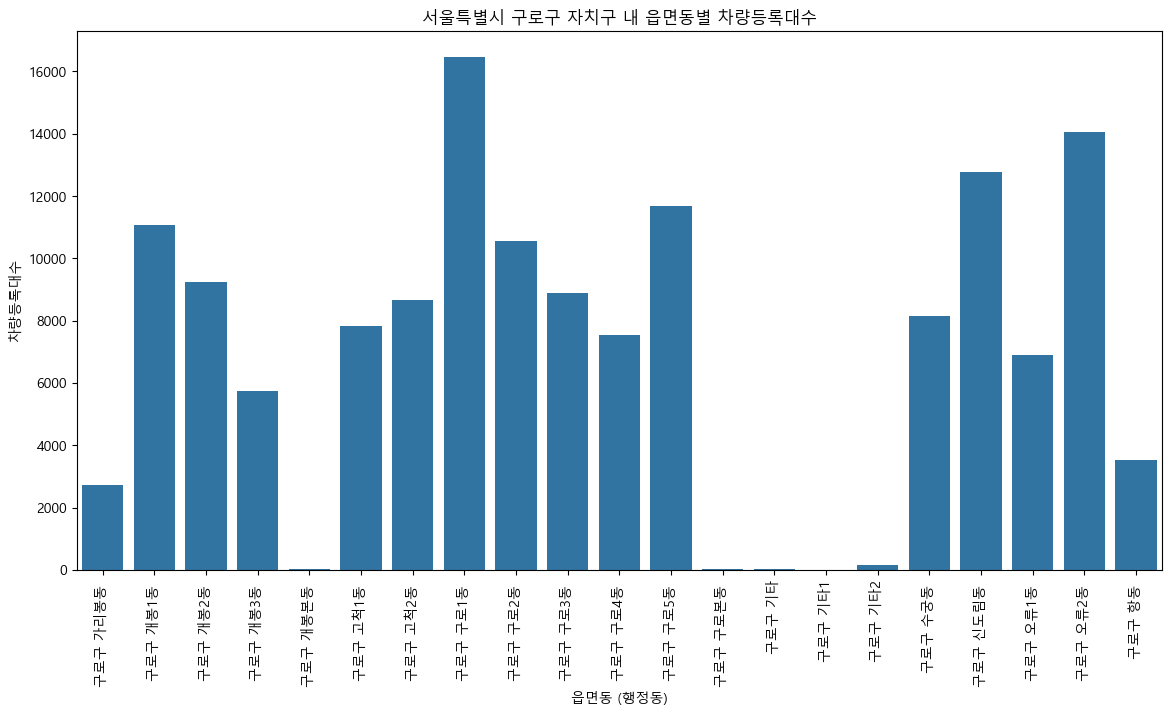

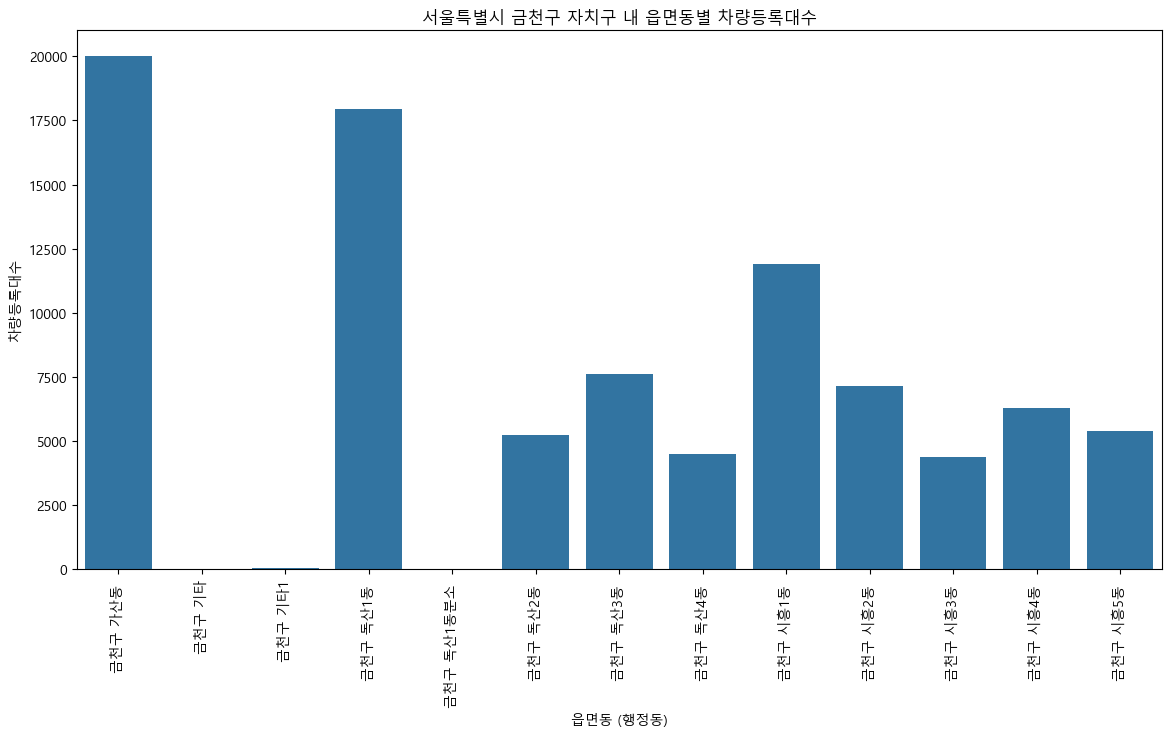

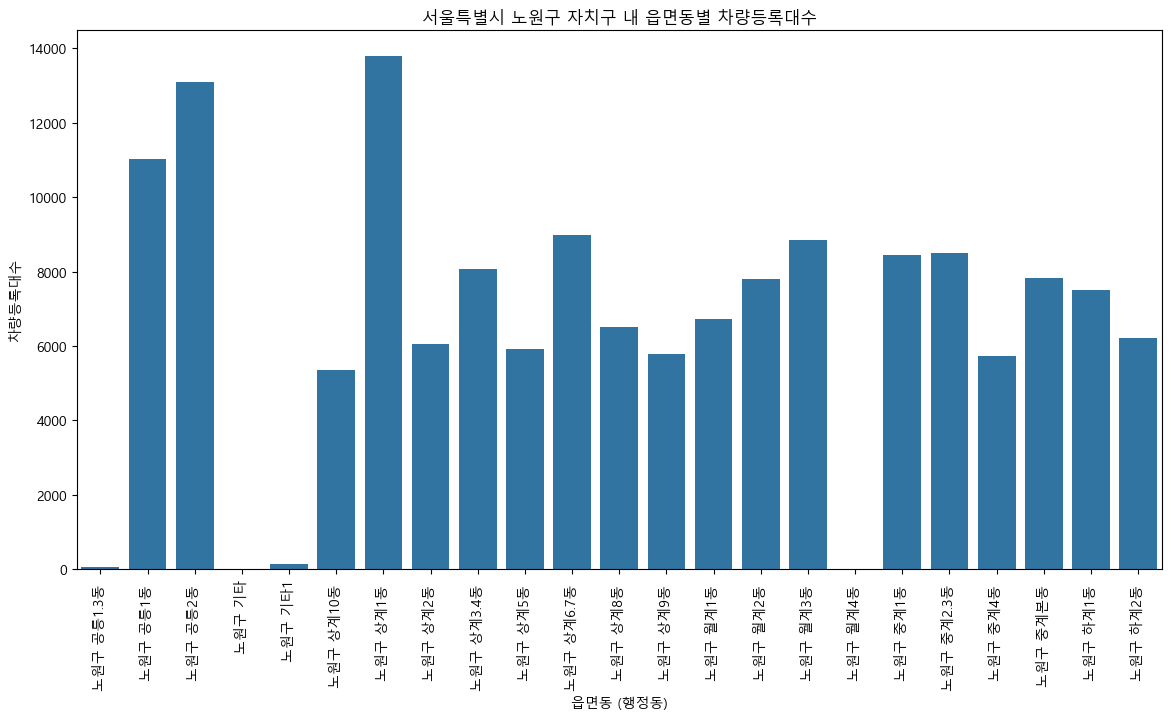

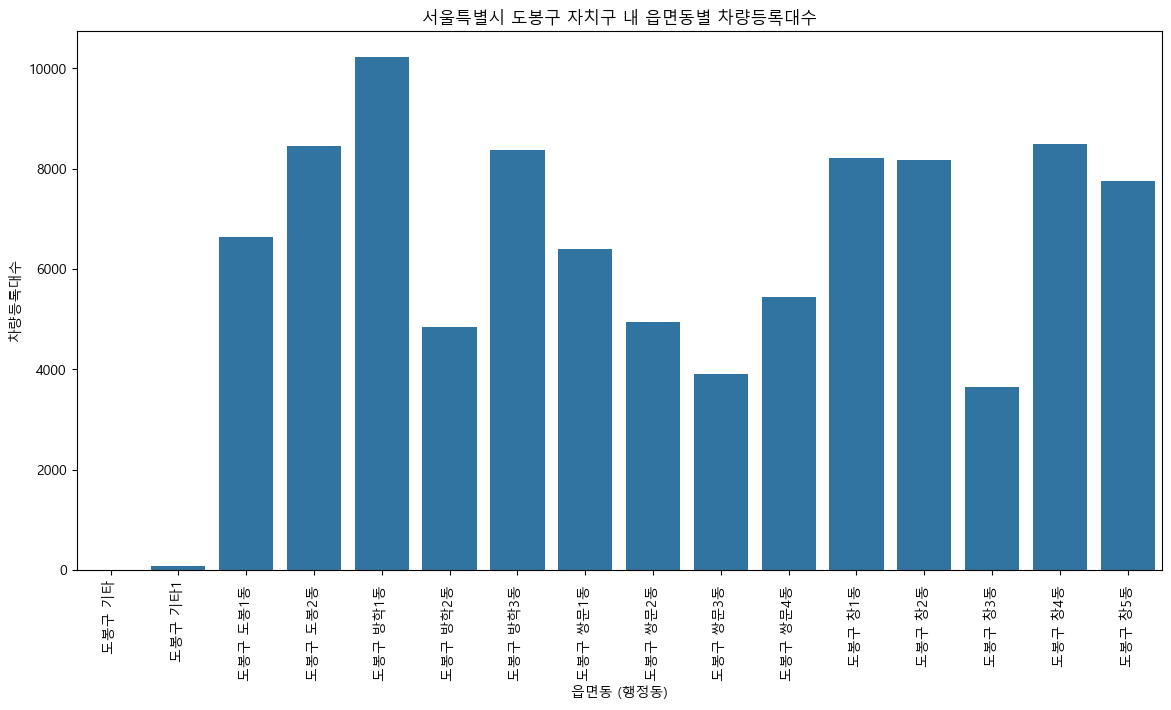

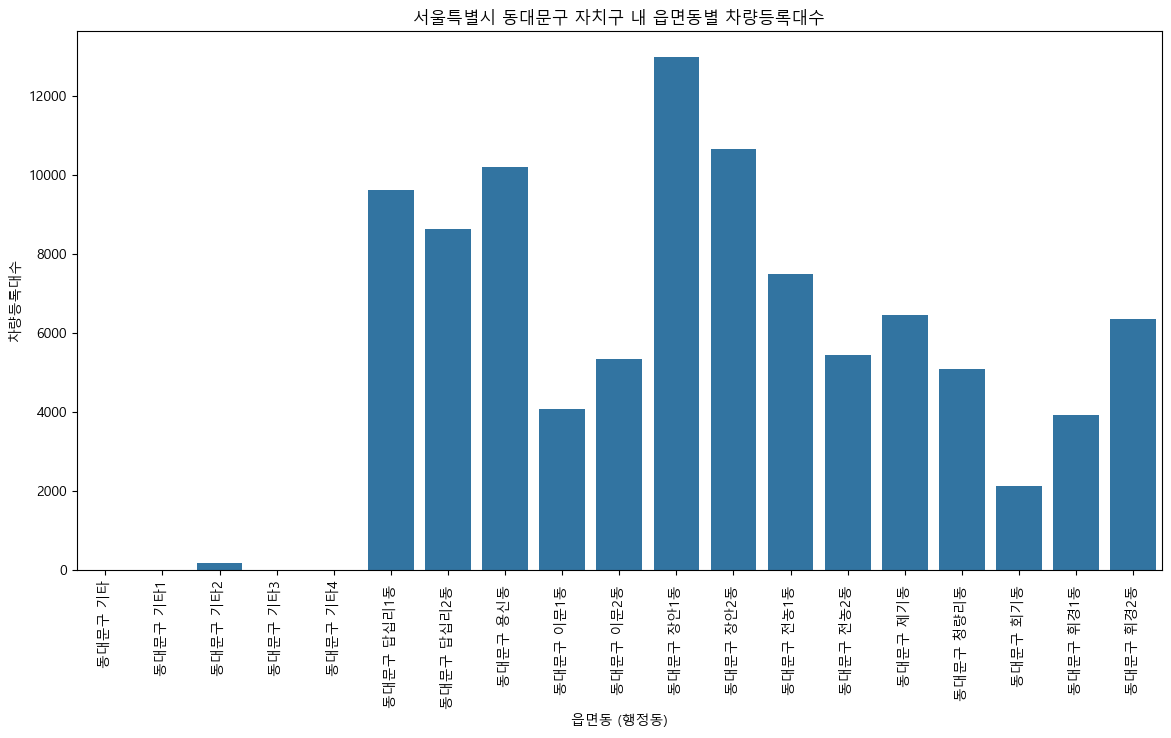

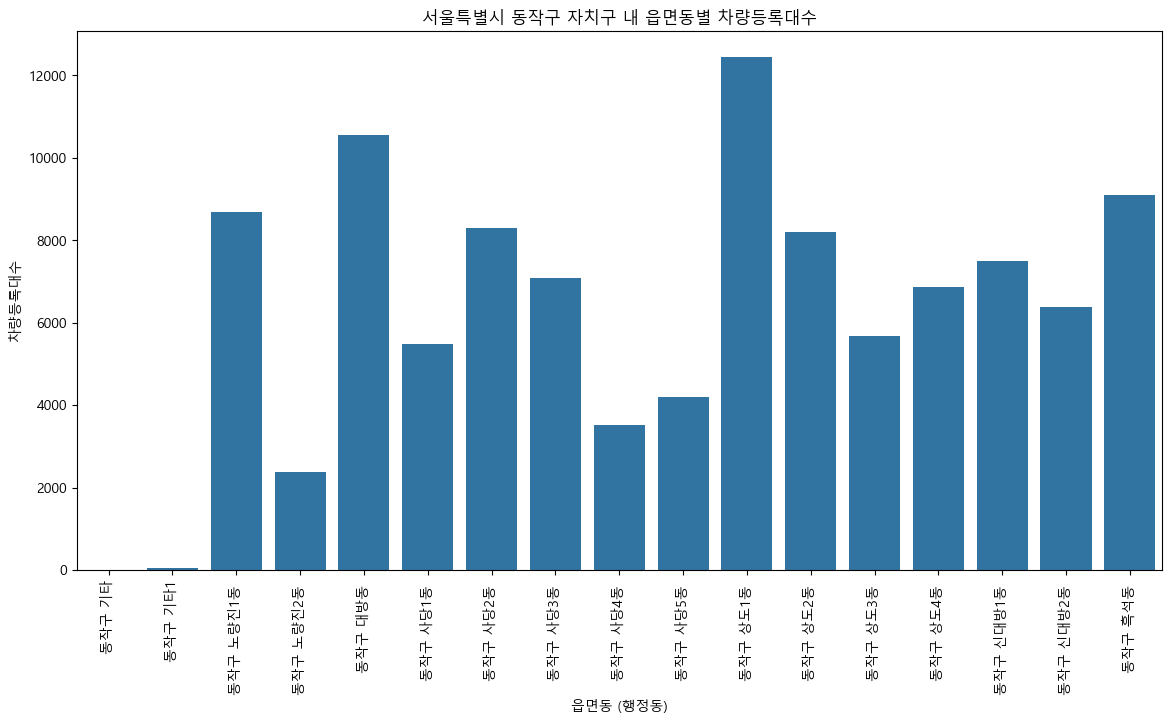

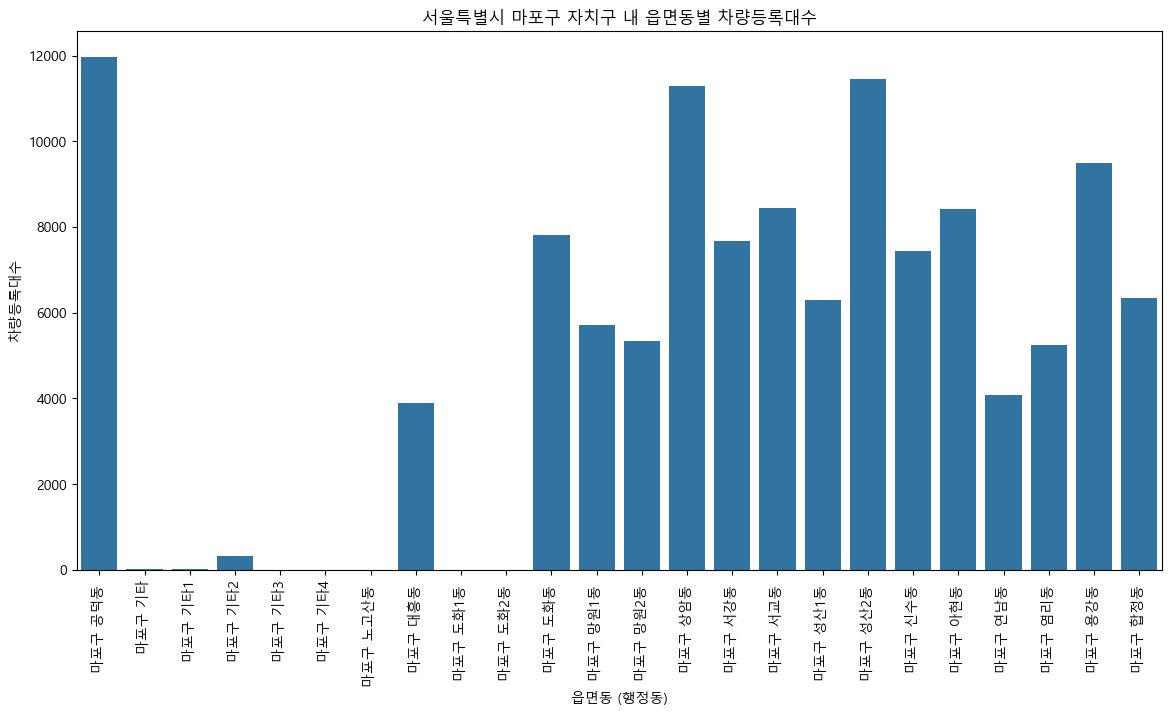

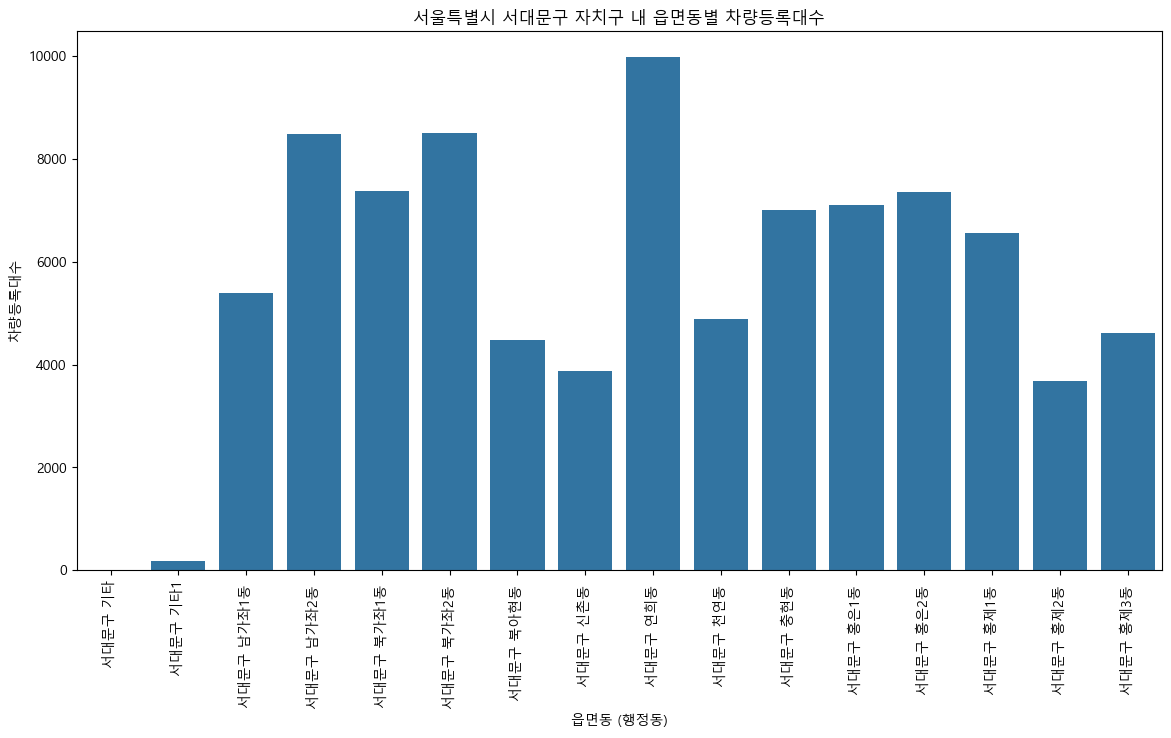

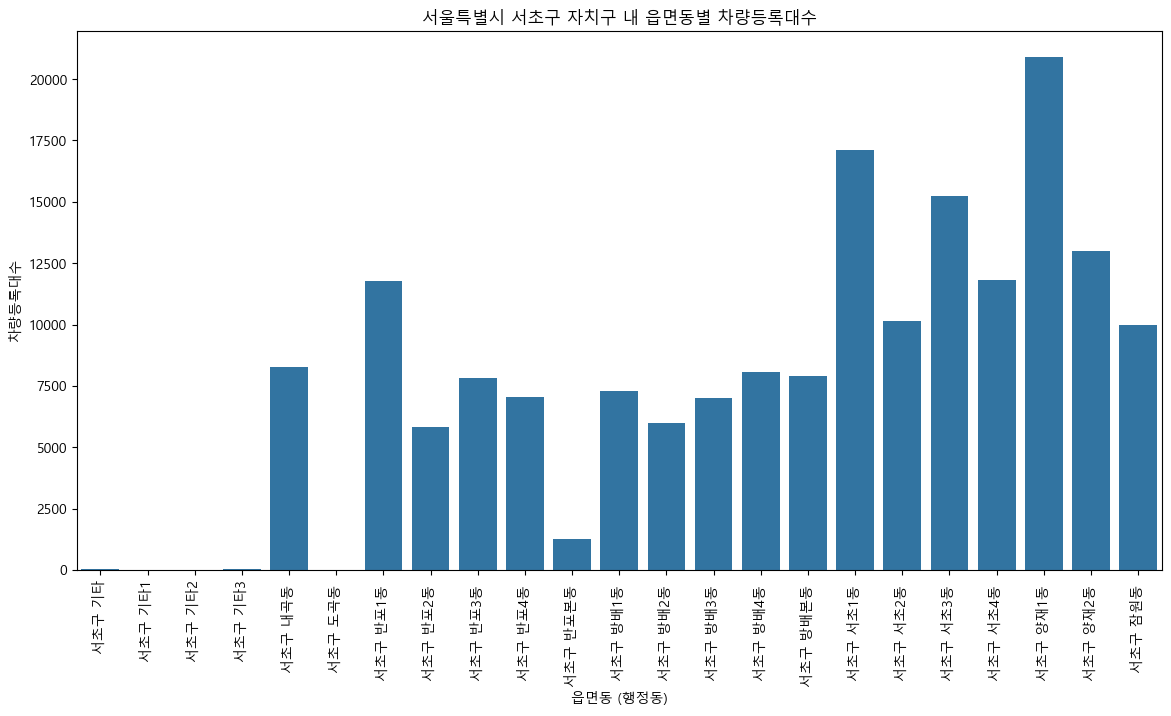

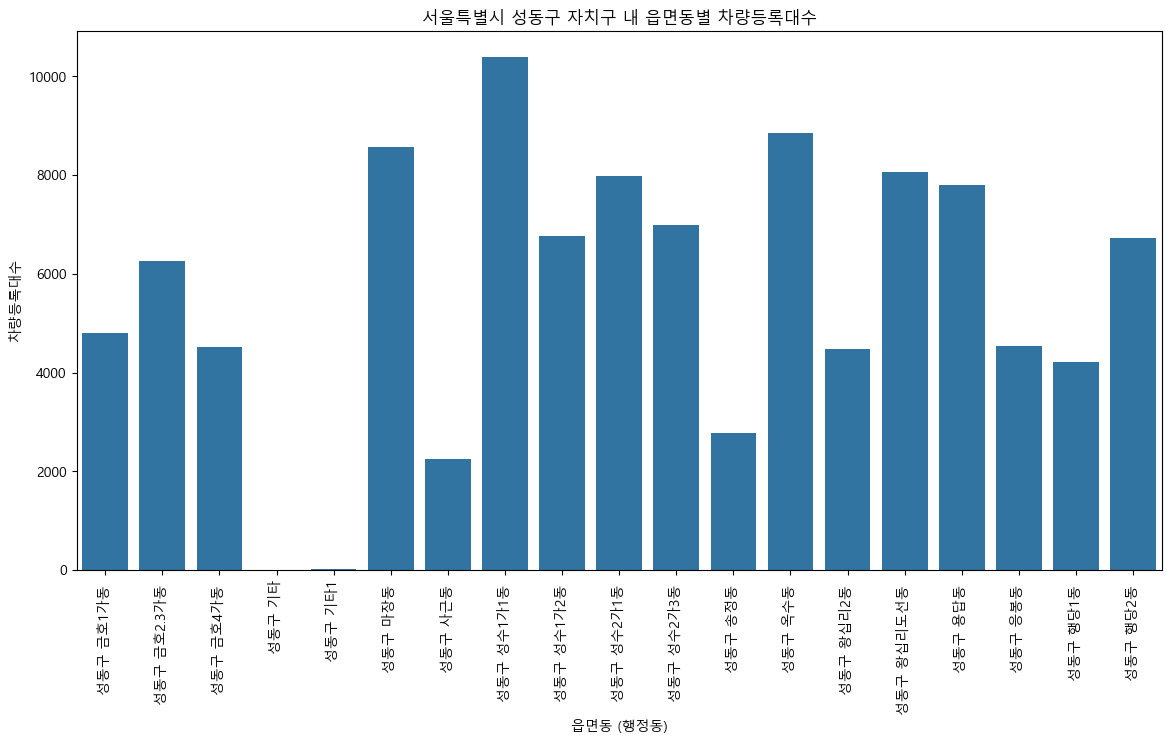

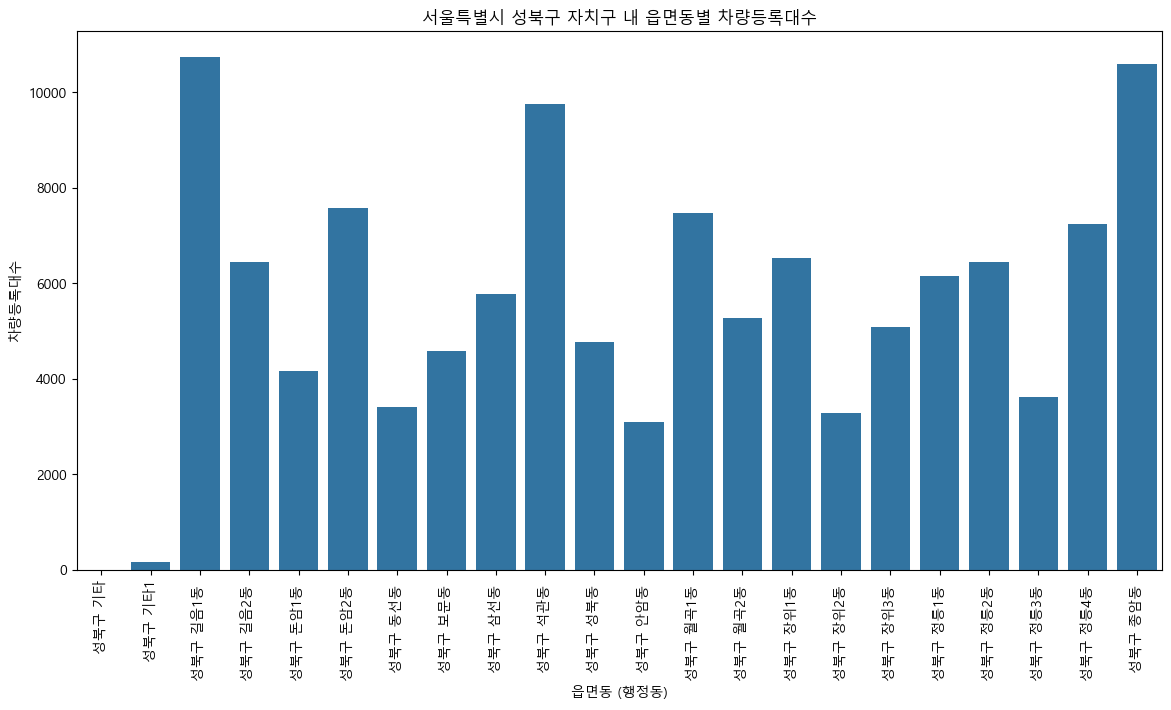

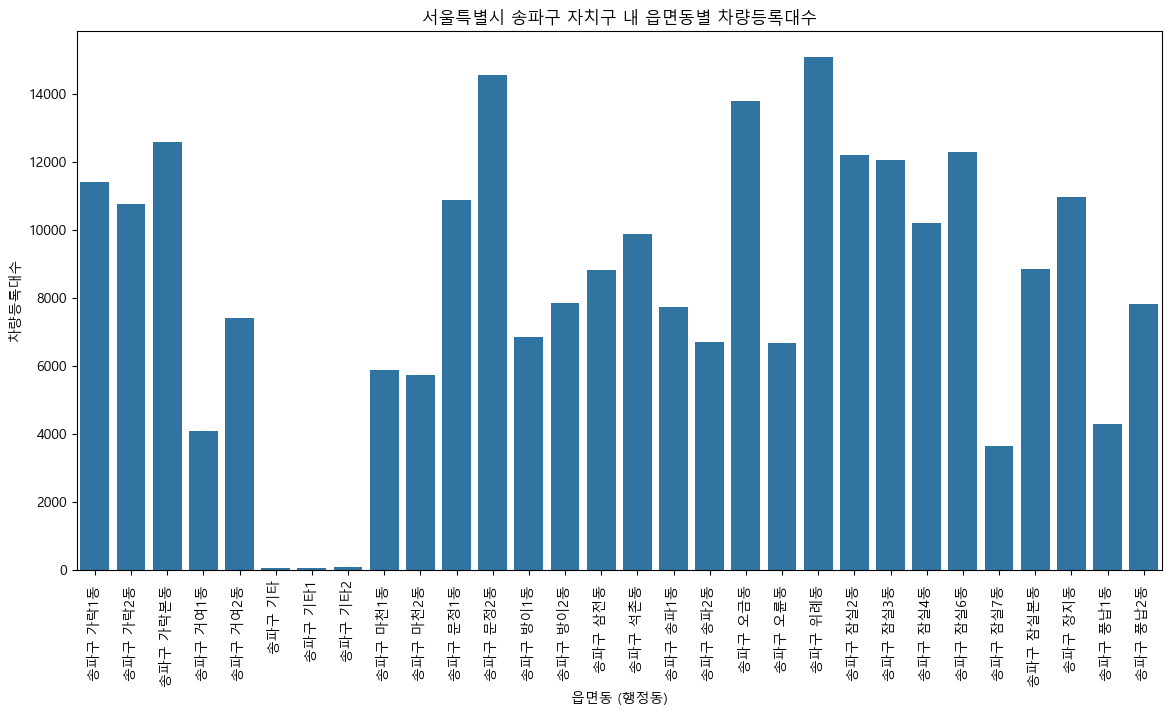

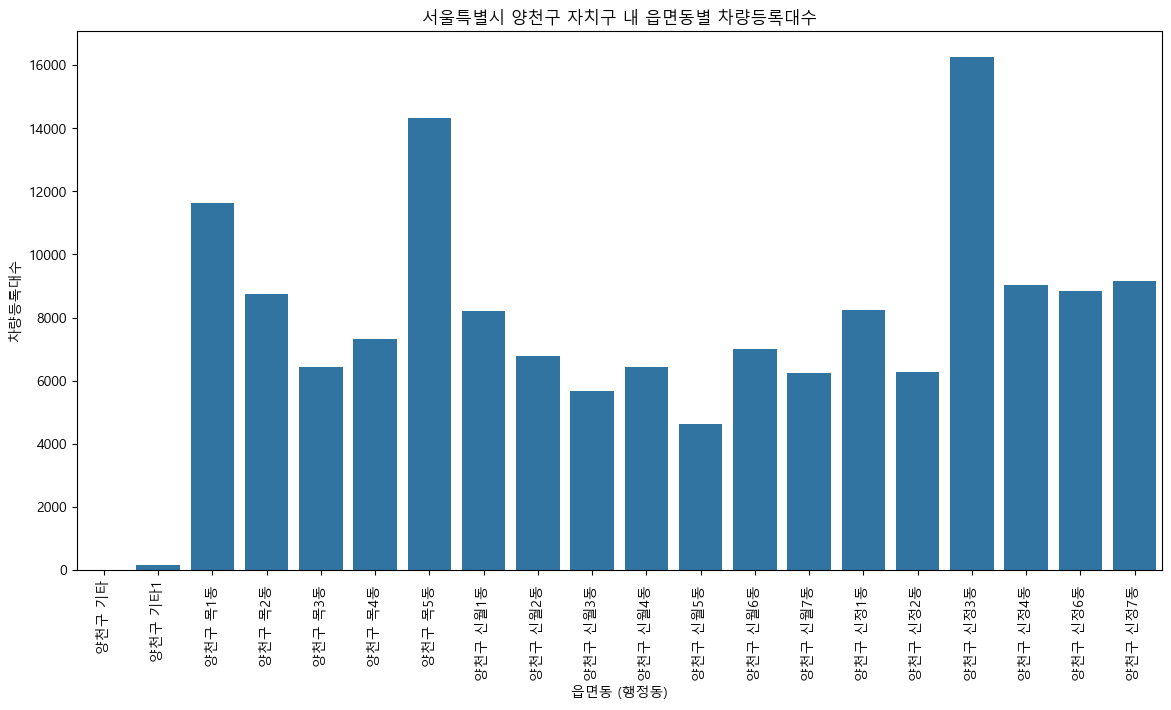

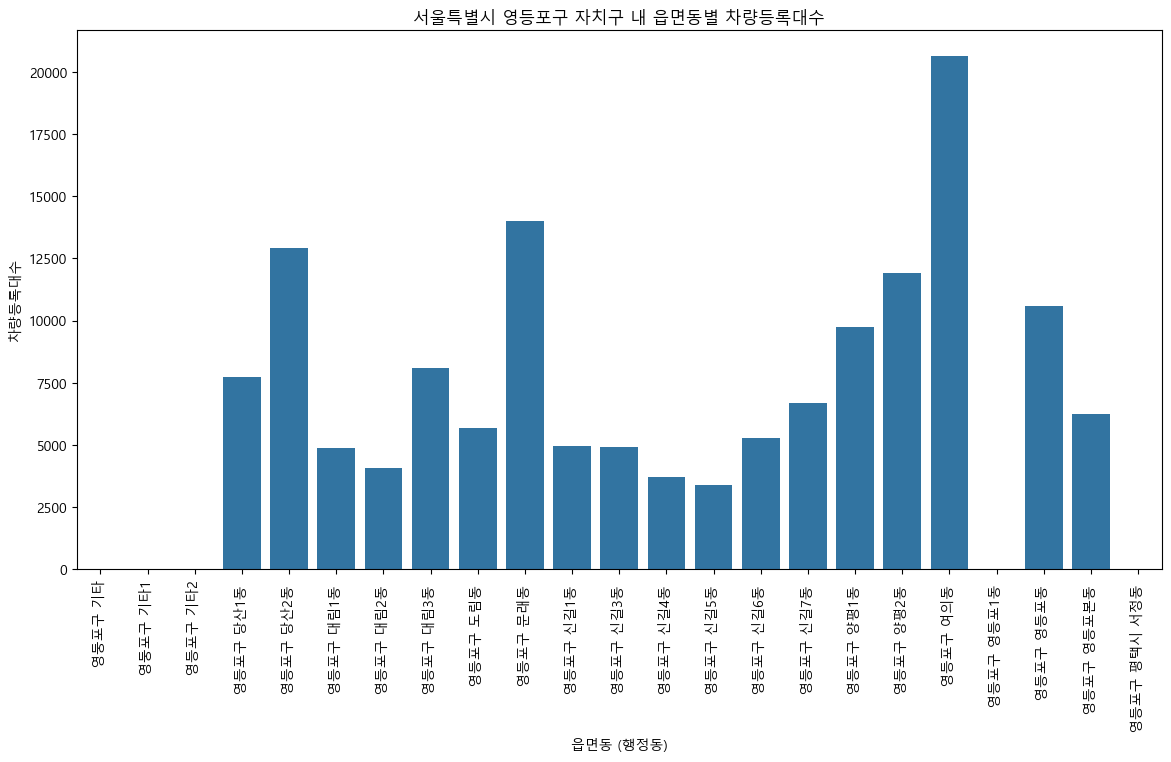

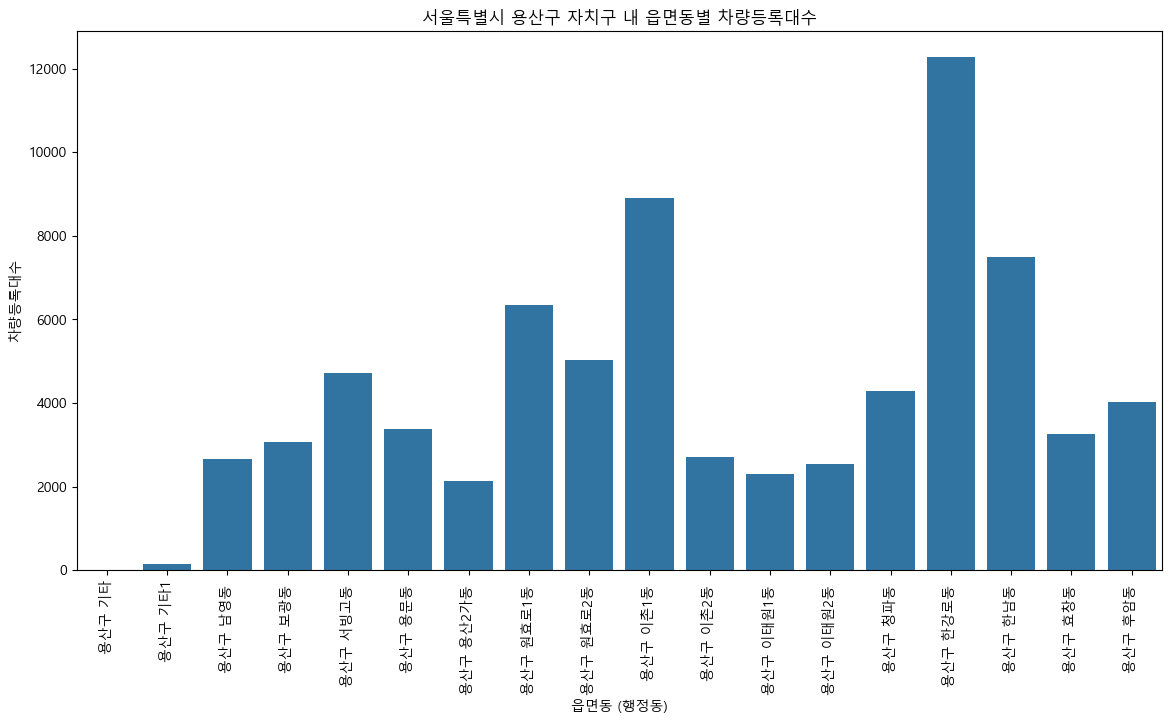

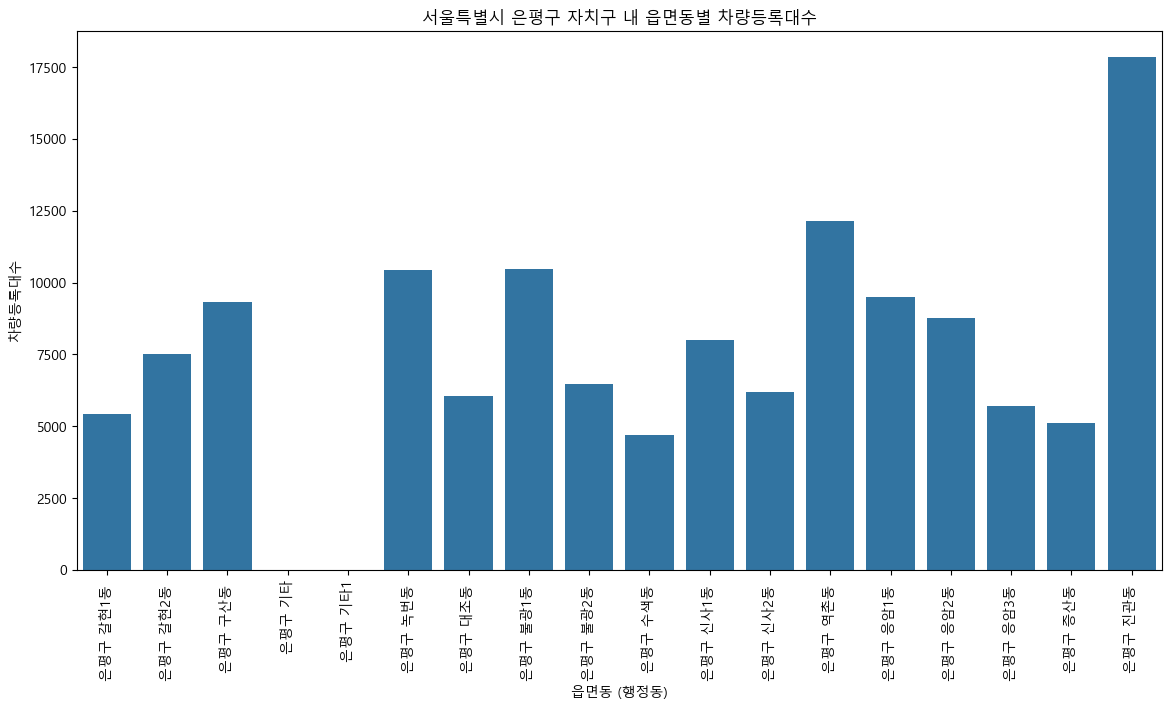

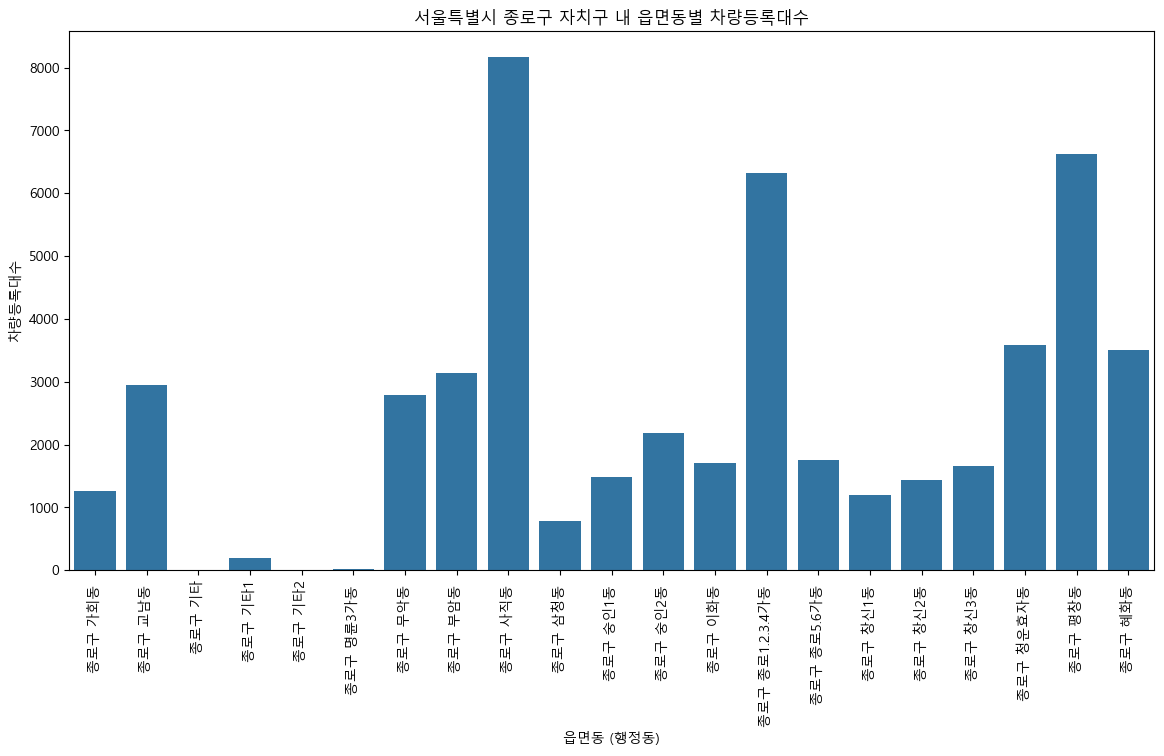

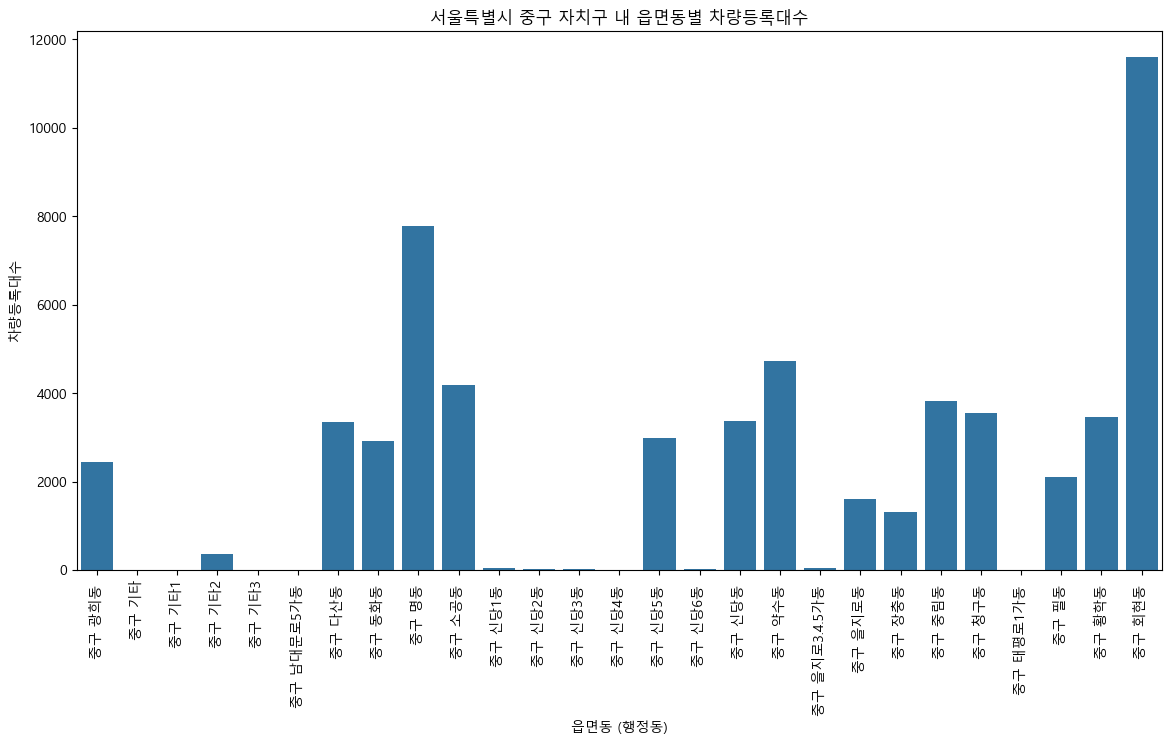

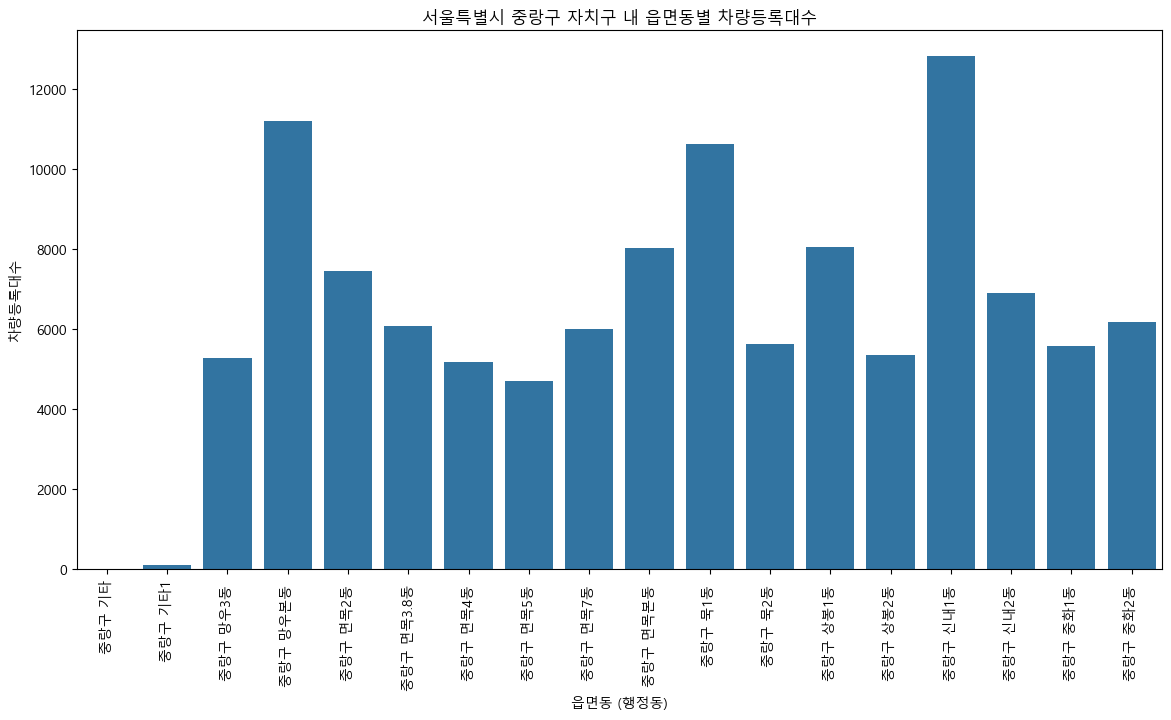

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# 자치구 리스트
sigu_list = car_final["사용본거지 시군구"].unique()

# 자치구별로 반복문 돌리기
for sigu in sigu_list:
    # 자치구별 데이터 필터링
    car_sigu = car_final[car_final["사용본거지 시군구"] == sigu]
    
    # 바 그래프 그리기
    plt.figure(figsize=(14, 7))
    sns.barplot(x="읍면동 (행정동)", y="계", data=car_sigu, estimator="sum")
    plt.xticks(rotation=90)
    plt.title(f"{sigu} 자치구 내 읍면동별 차량등록대수")
    plt.xlabel("읍면동 (행정동)")
    plt.ylabel("차량등록대수")
    plt.show()


